In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canada-per-capital-income/canada_per_capita_income.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/canada-per-capital-income/canada_per_capita_income.csv')

In [4]:
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


Text(0, 0.5, 'per capita income (US$)')

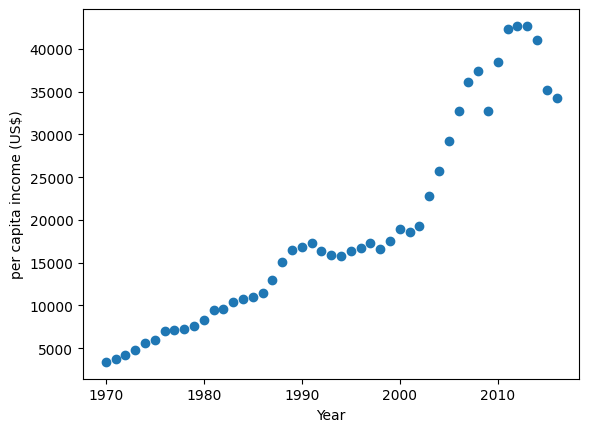

In [5]:
plt.scatter(df.year,df["per capita income (US$)"])
plt.xlabel('Year')
plt.ylabel('per capita income (US$)')

In [6]:
x=df.iloc[:,:-1]

In [7]:
x.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [8]:
y=df.iloc[:,-1]

In [9]:
y.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 1)
(12, 1)
(35,)
(12,)


In [13]:
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
m=lr.coef_

In [15]:
c=lr.intercept_

In [16]:
y_pred=lr.predict(x_test)

In [17]:
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
print("R2 score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 score:  0.8326731993898341
MSE:  16449291.422073923


In [19]:
x_predict=lr.predict(x_train)

In [20]:
new_df = pd.DataFrame({"year": x_train['year'].values, "Actual": y_train, "Predicted": x_predict})


In [21]:
new_df

,year,Actual,Predicted
46,2016,34229.193630,39286.260973
33,2003,22739.426280,28051.499124
23,1993,15875.586730,19409.374624
34,2004,25719.147150,28915.711574
27,1997,17310.757750,22866.224424
21,1991,17266.097690,17680.949724
13,1983,10416.536590,10767.250124
38,2008,37446.486090,32372.561373
17,1987,12974.806620,14224.099924
42,2012,42665.255970,35829.411173


In [22]:
m*2020+c

array([42743.11077297])